In [1]:
pip install sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sqlalchemy in c:\users\harmeet kaur\anaconda3\lib\site-packages (2.0.34)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Connection successful!
                          sku_name  qty_2021  qty_2022  difference  \
0                   MEGUIAR_G12718     268.0      68.0      -200.0   
1                HP_AB201TUN8L18PA     168.0      21.0      -147.0   
2  Dawlance_bundle_DWEK-8229_clear     228.0     109.0      -119.0   
3                corio_C 101150-45     247.0     133.0      -114.0   
4             Careem_25000 Credits     168.0     127.0       -41.0   

   percentage_change change_class  
0             -74.63         down  
1             -87.50         down  
2             -52.19         down  
3             -46.15         down  
4             -24.40         down  


C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_1588\719409913.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


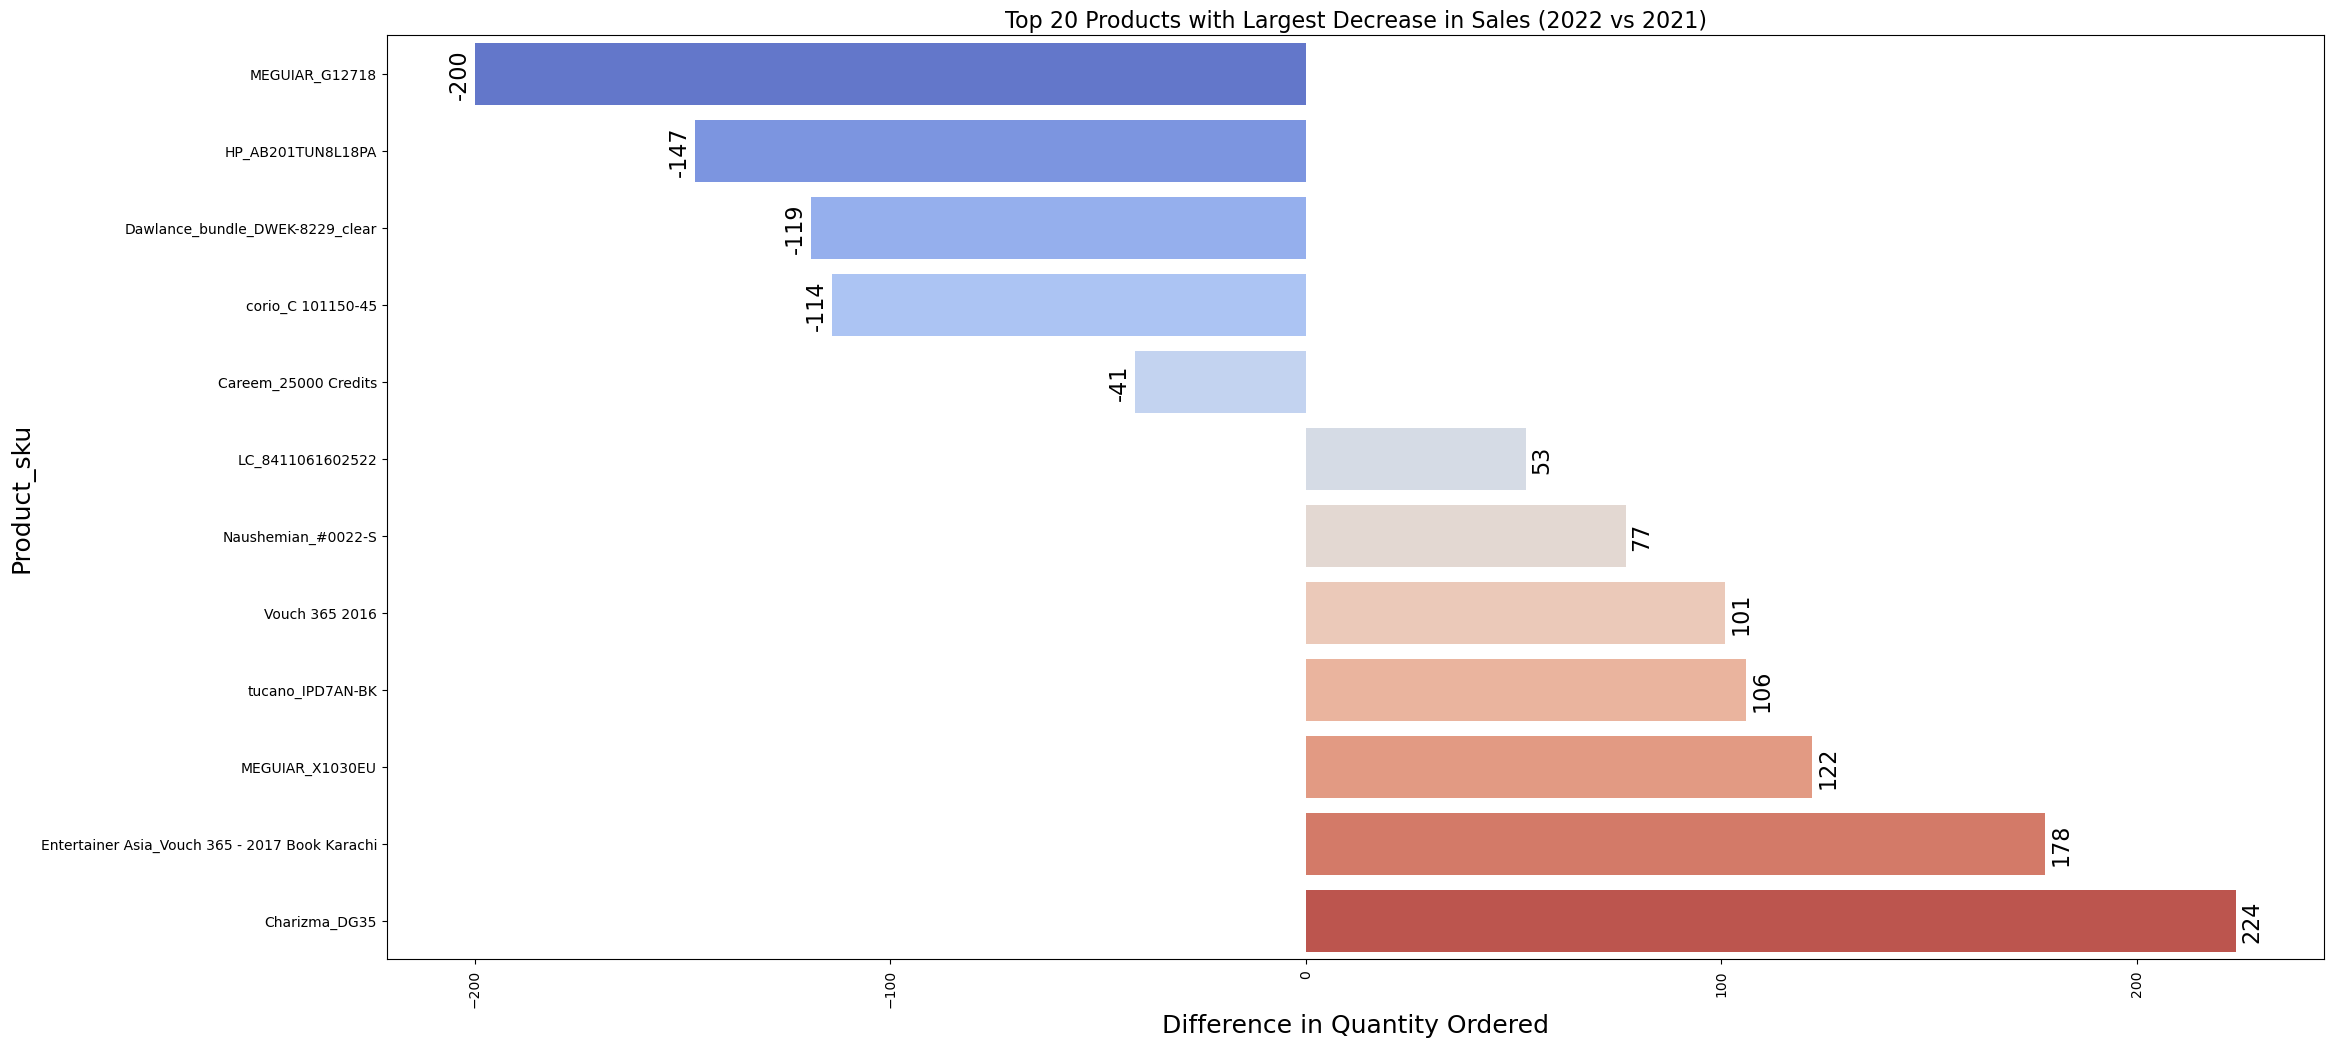

Database connection closed.


In [6]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def connect_to_mysql():
    connection = None
    try:
        connection = mysql.connector.connect(
            host="127.0.0.1",  
            user="root",       
            password="**********",  
            database="project"  
        )
        print("Connection successful!")

        query = """
            select a.sku_name, 
                   a.qty_ordered as qty_2021, 
                   b.qty_ordered as qty_2022,
                   b.qty_ordered - a.qty_ordered as difference,
                   round(((b.qty_ordered - a.qty_ordered) * 100.0 / a.qty_ordered), 2) as percentage_change,
                   case
                       when b.qty_ordered - a.qty_ordered < 0 then 'down'
                       when b.qty_ordered - a.qty_ordered > 0 then 'up'
                       else 'fair'
                   end as change_class
            from yr_2021 a
            join yr_2022 b on a.sku_name = b.sku_name
            order by difference asc
            limit 20;
        """

        df = pd.read_sql(query, connection)
        print(df.head())

    
        plt.figure(figsize=(25,12))
        ax=sns.barplot(data=df,x = "difference",y = "sku_name",hue="sku_name",palette='coolwarm')

        plt.xticks(rotation=90)

        plt.xlabel('Difference in Quantity Ordered',fontsize=18)
        plt.ylabel('Product_sku',fontsize=18)
        plt.title('Top 20 Products with Largest Decrease in Sales (2022 vs 2021)',fontsize=16)

        for container in ax.containers:
             ax.bar_label(container, fmt='%.0f', label_type='edge',fontsize=16,rotation=90, padding=3)
    
        plt.show()
        

    except Error as e:
        print(f"An error occurred: {e}")
    finally:
        if connection:
            connection.close()
            print("Database connection closed.")

connect_to_mysql()